This is a script that loads an excel sheet from the data folder containing the results of a review of C:V relationship in terms of A and B values for different particles

In [1]:
#Load data
import pandas as pd
data = pd.read_excel(r'D:/GIT/NGA_particles_flux_publication/Data/V_C Emperical_Values_Review.xlsx')
print(data)

           A Low  A Low Uncertainity  A High  A High Uncertainity    A Units  \
0   1.000000e-10        4.000000e-11     NaN                  NaN  mg C μm−3   
1   1.000000e-10        4.000000e-11     NaN                  NaN  mg C μm−3   
2   1.000000e-10        4.000000e-11     NaN                  NaN  mg C μm−3   
3   1.000000e-10        4.000000e-11     NaN                  NaN  mg C μm−3   
4   1.000000e-10        4.000000e-11     NaN                  NaN  mg C μm−3   
..           ...                 ...     ...                  ...        ...   
58  9.053036e-12                 NaN     NaN                  NaN  mg C μm−3   
59  9.053036e-12                 NaN     NaN                  NaN  mg C μm−3   
60  1.421803e-07                 NaN     NaN                  NaN  mg C μm−3   
61  5.754354e-07                 NaN     NaN                  NaN  mg C μm−3   
62  5.754354e-07                 NaN     NaN                  NaN  mg C μm−3   

           B  B Uncertainity   Particle

In [2]:
x = 'Aggregate'
df_sub_this_study = data[(data["Particle Type"] == x) & (data.Source.str.contains('This study optimize.minimize'))]#["Source"] == "This study")]
print(df_sub_this_study)

agg_a_err = np.array([[7.66205681e-08], [6.11907258e-08]])
print(a_err)
agg_b_err = np.array([[0.02715025], [0.05340398]])
print(b_err)

fp_a_err = np.array([[6.65855367e-08], [5.60717980e-08]])
print(fp_a_err)
fp_b_err = np.array([[0.01804928],  [0.01603744]])
print(fp_b_err)

           A Low  A Low Uncertainity  A High  A High Uncertainity    A Units  \
57  6.574672e-11                 NaN     NaN                  NaN  mg C μm−3   

           B  B Uncertainity Particle Type           Other Information  \
57  0.846849             NaN     Aggregate  Minimization (gel to trap)   

                          Source  ...  Original A Low Uncertainity  \
57  This study optimize.minimize  ...                          NaN   

    Original A High  Origingal A High Uncertainity  Original A Units  \
57              NaN                            NaN               NaN   

   A low in mg C μm−3  A high in mg C μm−3  Original B  \
57                NaN                  NaN         NaN   

    Original B Uncertainity  Original B Units  Notes  
57                      NaN               NaN    NaN  

[1 rows x 21 columns]


NameError: name 'np' is not defined

D:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
D:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
D:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
D:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
D:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
D:\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order

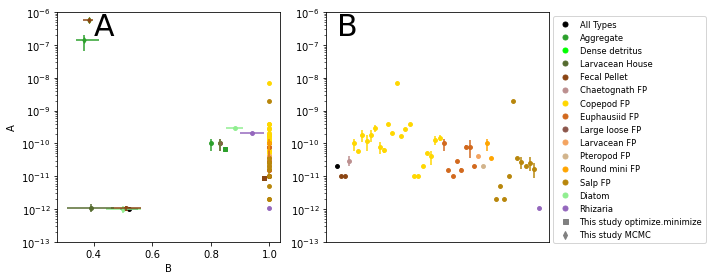

In [45]:
#plot data 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

colors = ['tab:green', 'k','rosybrown','gold','lime','lightgreen','chocolate','saddlebrown','tab:brown','sandybrown','darkolivegreen','tan','tab:purple','orange','darkgoldenrod']
particle_types = ['Aggregate', 'All Types', 'Chaetognath FP', 'Copepod FP', 'Dense detritus', 'Diatom', 'Euphausiid FP', 'Fecal Pellet', 'Large loose FP', 'Larvacean FP',
                  'Larvacean House', 'Pteropod FP', 'Rhizaria', 'Round mini FP', 'Salp FP']
fig1= plt.figure(1, figsize=(10,4))
plt.subplot(1,2,1)
plt.ylim([10**(-13), 10**(-6)])
plt.yscale("log")
plt.ylabel("A")
plt.xlabel("B")
x1 = 0
for x in np.unique(data["Particle Type"]):
    df_sub = data[(data["Particle Type"] == x) & (~data.Source.str.contains('This study'))]#["Source"] != "This study")]
    df_sub_this_study = data[(data["Particle Type"] == x) & (data.Source.str.contains('This study optimize.minimize'))]#["Source"] == "This Study")]
    df_sub_this_study_mcmc = data[(data["Particle Type"] == x) & (data.Source.str.contains('This study MCMC'))]#["Source"] == "This Study")]
    plt.scatter(df_sub.B, df_sub["A Low"], c = colors[x1], s = 15)
    plt.errorbar(df_sub.B, df_sub["A Low"], xerr=df_sub["B Uncertainity"], yerr = df_sub["A Low Uncertainity"], fmt="none", c = colors[x1])
    plt.scatter(df_sub_this_study.B, df_sub_this_study["A Low"], c = colors[x1], s = 15, marker = 's')
    plt.scatter(df_sub_this_study_mcmc.B, df_sub_this_study_mcmc["A Low"], c = colors[x1], s = 15, marker = 'd')
#    plt.errorbar(df_sub_this_study_mcmc.B, df_sub_this_study_mcmc["A Low"], xerr=b_err, yerr = a_err, fmt="none", c = colors[x1])
#    plt.errorbar(df_sub_this_study_mcmc.B, df_sub_this_study_mcmc["A Low"], xerr=0.1, yerr = 0.000001, fmt="none", c = colors[x1])
    x1 = x1+1
df_sub_this_study_mcmc = data[(data["Particle Type"] == 'Aggregate') & (data.Source.str.contains('This study MCMC'))]#["Source"] == "This Study")]
plt.errorbar(df_sub_this_study_mcmc.B, df_sub_this_study_mcmc["A Low"], xerr=agg_b_err, yerr = agg_a_err, c = colors[0])#fmt="none",
df_sub_this_study_mcmc = data[(data["Particle Type"] == 'Fecal Pellet') & (data.Source.str.contains('This study MCMC'))]#["Source"] == "This Study")]
plt.errorbar(df_sub_this_study_mcmc.B, df_sub_this_study_mcmc["A Low"], xerr=fp_b_err, yerr = fp_a_err, c = colors[7])#fmt="none",

#plt.tight_layout()
particle_types = ["All Types", "Aggregate","Dense detritus","Larvacean House", 
                  "Fecal Pellet", "Chaetognath FP", "Copepod FP", "Euphausiid FP", "Large loose FP", "Larvacean FP", "Pteropod FP" , "Round mini FP", "Salp FP", 
                  "Diatom", "Rhizaria"]
colors = ['k', 'tab:green', 'lime','darkolivegreen',
          'saddlebrown', 'rosybrown', 'gold','chocolate','tab:brown', 'sandybrown', 'tan', 'orange','darkgoldenrod', 
         'lightgreen','tab:purple']

plt.text(0.4, 2*10**(-7), 'A', dict(size=30))
#Another Figure with just A values
particle_types = ["All Types", "Aggregate","Dense detritus","Larvacean House", 
                  "Fecal Pellet", "Chaetognath FP", "Copepod FP", "Euphausiid FP", "Large loose FP", "Larvacean FP", "Pteropod FP" , "Round mini FP", "Salp FP", 
                  "Diatom", "Rhizaria"]
colors = ['k', 'tab:green', 'lime','darkolivegreen',
          'saddlebrown', 'rosybrown', 'gold','chocolate','tab:brown', 'sandybrown', 'tan', 'orange','darkgoldenrod', 
         'lightgreen','tab:purple']

plt.subplot(1,2,2)
plt.ylim([10**(-13), 10**(-6)])
plt.yscale("log")
x1 = 0
x2 = 0
for x in particle_types:
    df_sub = data[(data["Particle Type"] == x) & (data["B"] == 1)]
    x = range(x2, x2+len(df_sub))
    plt.scatter(x, df_sub["A Low"], c = colors[x1], s = 15)
    plt.errorbar(x, df_sub["A Low"], yerr = df_sub["A Low Uncertainity"], fmt = "none", c = colors[x1]) 
    x1 = x1+1
    x2 = x2+ len(df_sub)
#turn off x ticks and labels
plt.xticks([])
#plt.yticks([10**(-13), 10**(-12), 10**(-11), 10**(-10),10**(-9),  10**(-8)], labels=[])
plt.text(0.1, 2*10**(-7), 'B', dict(size=30))
legend_elements = [Line2D([0], [0], color=colors[0], marker='o', markersize = 5, label=particle_types[0], linestyle = 'None'),
                   Line2D([0], [0], color=colors[1], marker='o', markersize = 5, label=particle_types[1], linestyle = 'None'),
                   Line2D([0], [0], color=colors[2], marker='o', markersize = 5, label=particle_types[2], linestyle = 'None'),
                   Line2D([0], [0], color=colors[3], marker='o', markersize = 5, label=particle_types[3], linestyle = 'None'),
                   Line2D([0], [0], color=colors[4], marker='o', markersize = 5, label=particle_types[4], linestyle = 'None'),
                   Line2D([0], [0], color=colors[5], marker='o', markersize = 5, label=particle_types[5], linestyle = 'None'),
                   Line2D([0], [0], color=colors[6], marker='o', markersize = 5, label=particle_types[6], linestyle = 'None'),
                   Line2D([0], [0], color=colors[7], marker='o', markersize = 5, label=particle_types[7], linestyle = 'None'),
                   Line2D([0], [0], color=colors[8], marker='o', markersize = 5, label=particle_types[8], linestyle = 'None'),
                   Line2D([0], [0], color=colors[9], marker='o', markersize = 5, label=particle_types[9], linestyle = 'None'),
                   Line2D([0], [0], color=colors[10], marker='o', markersize = 5, label=particle_types[10], linestyle = 'None'),
                   Line2D([0], [0], color=colors[11], marker='o', markersize = 5, label=particle_types[11], linestyle = 'None'),
                   Line2D([0], [0], color=colors[12], marker='o', markersize = 5, label=particle_types[12], linestyle = 'None'),
                   Line2D([0], [0], color=colors[13], marker='o', markersize = 5, label=particle_types[13], linestyle = 'None'),
                   Line2D([0], [0], color=colors[14], marker='o', markersize = 5, label=particle_types[14], linestyle = 'None'),
                   Line2D([0], [0], color='grey', marker='s', markersize = 5, label='This study optimize.minimize', linestyle = 'None'),
                   Line2D([0], [0], color='grey', marker='d', markersize = 5, label='This study MCMC', linestyle = 'None')]
#plt.legend(handles = legend_elements, loc='center left', ncol = 2, fontsize = 'small')
plt.legend(handles = legend_elements, bbox_to_anchor=(1, 1), ncol = 1, fontsize = 'small')
plt.tight_layout()
plt.savefig(f'D:/GIT/NGA_particles_flux_publication/Plots/C_to_V_or_A_and_B_Lit_Review.png', dpi = 300, bbox_inches = 'tight')